In [17]:
import gzip
import csv
import json
import datetime
from dateutil import parser
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [19]:
dico_time = dict()
dico_alter = dict()

In [21]:
def line_cleaner(line):
    author,cluster,timestamp,status,comment = line.decode().split(',')
    return [author, timestamp, datetime.datetime.fromtimestamp(int(timestamp))]

In [22]:
with gzip.open('sample_data/0a0a076ff04b3663aa821ff2a0b2c41a.csv.gz', 'rb') as f:
    header = f.readline().decode()
    first_line = line_cleaner(f.readline())
    id_ego = first_line[0]
    original_time = first_line[2] 
    time_plus_30 = original_time + datetime.timedelta(days=30)
    cmp = 0
    L = []
    for line in f:
        person = line_cleaner(line)
        if person[0] != id_ego :
            if person[2] > time_plus_30:
                L.append(cmp)
                dico_time[(original_time.month,original_time.year)] = sum(L[::-1][0:12])
                original_time = time_plus_30
                time_plus_30 = time_plus_30 + datetime.timedelta(days=30)
                cmp = 0
            if person[0] not in dico_alter.keys():
                dico_alter[person[0]] = person[2]
                cmp+=1

In [23]:
def dict_to_csv(dico):
    L = [] 
    for k,v in dico.items():
        L.append({'Month':k[0],'Year':k[1],'AlterCount':v})
    return L

In [24]:
csv_file = id_ego + '_alter-count.csv'
csv_columns = ['Month','Year','AlterCount']
dict_data = dict_to_csv(dico_time)

In [25]:
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for data in dict_data:
            writer.writerow(data)
except IOError:
        print("I/O error")

In [26]:
dico_df = pd.DataFrame.from_dict(dict_data)

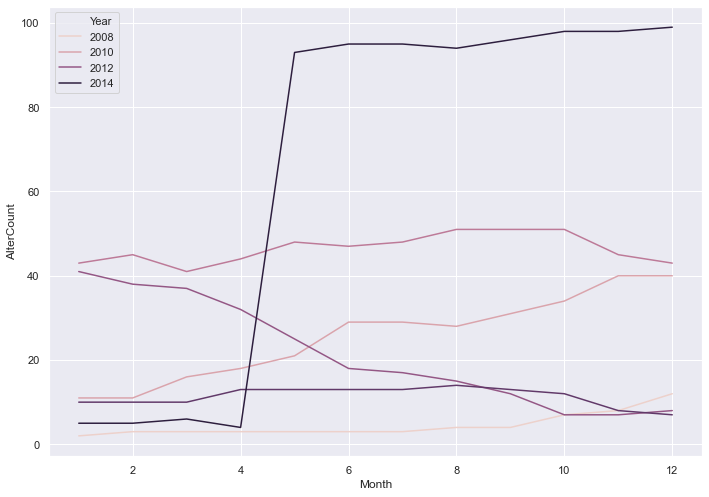

In [27]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x="Month", y="AlterCount",hue="Year",data=dico_df)
